In [83]:
import tensorflow  as tf 
import matplotlib.pyplot as plt 
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

(train_data,train_labels),(test_data, test_labels) = tf.keras.datasets.mnist.load_data()
print(train_data.shape,train_labels.shape)
train_data = train_data/255.

(60000, 28, 28) (60000,)


In [84]:
trainDB = tf.data.Dataset.from_tensor_slices((train_data,train_labels)).batch(200)
# 转化为Dataset之后, 方便调用.batch()来获取数据

In [85]:
# for step,(x,y) in enumerate(trainDB):
#     print(step,x.shape,y)

In [86]:
# 定义好模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(10)
])
# 定义优化器
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [87]:
def train_epoch(epoch):
    for step,(x,y) in enumerate(trainDB):
        with tf.GradientTape() as tape:
            #[b,28,28]转化为[b,784], 将图像展成一维数据
            x = tf.reshape(x,(-1,28*28))
            y = tf.one_hot(y,depth=10)
            # 计算模型输出值,可以直接带入模型就获得输出值
            out = model(x)
            # 计算损失函数,这里使用的mse损失函数
            loss = tf.reduce_sum(tf.square(y-out))/x.shape[0]

        # 计算神经网络偏导数值,这里使用的是自动求导工具
        # 这里trainable_variables中所有的参数数顺序排列的
        # 那么求导得到的倒数的排列顺序也和trainable_variables中的该参数的排列顺序是一样的
        # 注意这里要同tape.
        grads = tape.gradient(loss,model.trainable_variables)

        # 更新权值
        # 因为求导得到的倒数的排列顺序也和trainable_variables中的该参数的排列顺序是一样的
        # 所以可以直接使用optimizer.apply_gradients(zip(grads, model.trainable_variables))
        # 倒数会对应位置相加减
        optimizer.apply_gradients(zip(grads,model.trainable_variables))
        
        if step%100 == 0:
            print(epoch,step,'loss: ',loss.numpy())

In [88]:
def train():
    for epoch in range(30):
        train_epoch(epoch)

In [89]:
train()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 0 loss:  1.5810848
0 100 loss:  0.9397983
0 200 loss:  0.7346756
1 0 loss:  0.6780641
1 100 loss:  0.67678314
1 200 loss:  0.5579884
2 0 loss:  0.56817776
2 100 loss:  0.5887906
2 200 loss:  0.48938733
3 0 loss:  0.5122101
3 100 loss:  0.5381668
3 200 loss:  0.44938242
4 0 loss:  0.47488758
4 100 loss:  0.50282824
4 200 loss:  0.42099938
5 0 loss:  0.44717765
5 100 loss:  0.4758052
5 200 loss:  0.3989679
6 0 loss:  0.42489278
6 100 loss:  0.45403892
6 200 loss:  0.38112587
7 0 loss:  0.40619123
7 100 

Predicted label:  9
Predicted label:  5
Predicted label:  1
Predicted label:  8
Predicted label:  3
Predicted label:  5
Predicted label:  6
Predicted label:  8


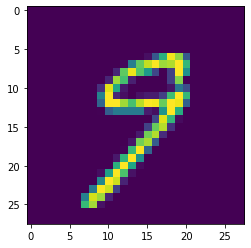

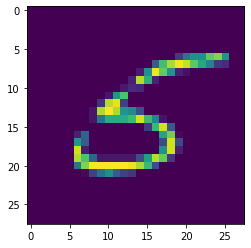

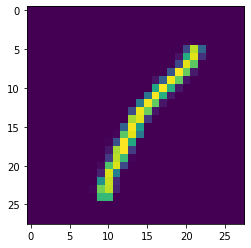

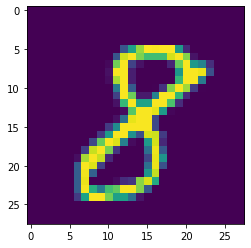

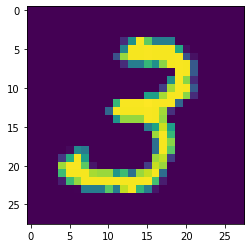

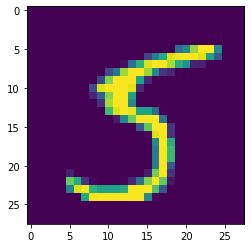

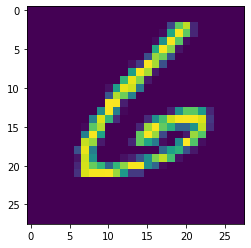

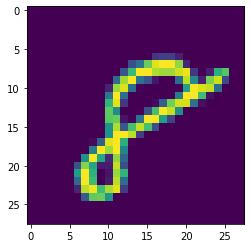

In [98]:
import numpy as np
for each_pic in train_data[-8:]:
    values = np.array(each_pic)
    plt.figure()
    flatten_img = tf.reshape([values],(-1,28*28))
    pred_label = model(flatten_img).numpy().argmax()
    plt.imshow(values)
    print('Predicted label: ', pred_label)